In [1]:
from torch_snippets import *
import selectivesearch

from torchvision import transforms, models, datasets
from torch_snippets import Report
from torchvision.ops import nms

device = 'cuda' if torch.cuda.is_available() else 'cpu'
device
##test change

'cuda'

In [2]:
import json
with open('/home/pawan/TII_IR-Tracking/src/Daytime/daytime.json', 'r') as f:
   coco_data = json.load(f)
   
images = coco_data['images']
file_names = [img['file_name'] for img in images]

In [3]:
# Add into datastructure
image_ids_annotations = defaultdict(list)

for ann in coco_data['annotations']:
    image_id = ann['image_id'] # Are integers
    image_ids_annotations[image_id].append(ann)

image_ids_annotations

defaultdict(list,
            {1: [{'id': 1,
               'image_id': 1,
               'category_id': 4,
               'segmentation': [],
               'area': 23852.41690000001,
               'bbox': [352.33, 143.06, 77.09, 309.41],
               'iscrowd': 0,
               'attributes': {'Truncation': '0', 'Occlusion': '1'}},
              {'id': 2,
               'image_id': 1,
               'category_id': 9,
               'segmentation': [],
               'area': 524.5268000000001,
               'bbox': [489.92, 233.3, 22.57, 23.24],
               'iscrowd': 0,
               'attributes': {'Occlusion': '1', 'Truncation': '0'}},
              {'id': 3,
               'image_id': 1,
               'category_id': 2,
               'segmentation': [],
               'area': 29444.600000000002,
               'bbox': [0.0, 86.5, 69.2, 425.5],
               'iscrowd': 0,
               'attributes': {'Truncation': '1', 'Occlusion': '0'}},
              {'id': 4,
         

In [34]:
# Get mapping category_id to category name
catergory_id_to_name = dict()
for ann in coco_data['categories']:
    catergory_id_to_name[ann['id']] = ann['name']

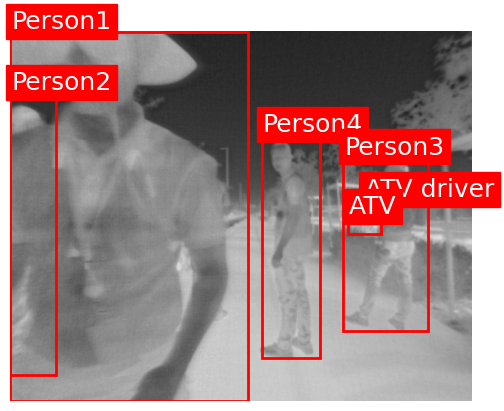

In [41]:
import matplotlib.patches as patches # For bounding boxes
image_name = "/home/pawan/TII_IR-Tracking/src/Daytime/IR/image0003.png"
image_id = int(image_name.split("image")[-1].split(".")[0])

img = Image.open(image_name)
fig, ax = plt.subplots()

# Add code to visualize boxes and labels
image_anns = image_ids_annotations[image_id]

# Get all bounding boxes and labels
for image_ann in image_anns:
    bbox = image_ann['bbox'] # Format: x, y, h, w, origin in top left corner
    name = catergory_id_to_name[image_ann['category_id']]

    # Extract bbox coordinates
    x = float(bbox[0])
    y = float(bbox[1])
    w = float(bbox[2])
    h = float(bbox[3])

    # Add text and bbox
    plt.text(x+1, y-5, name,fontdict={'fontsize':18.0, 'fontweight':'medium','color': 'white', 'backgroundcolor':'red'})
    bb = patches.Rectangle((x, y), w, h, linewidth=2, edgecolor='red', facecolor='none')
    ax.add_patch(bb)

ax.axis('off')
ax.imshow(img)
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


False


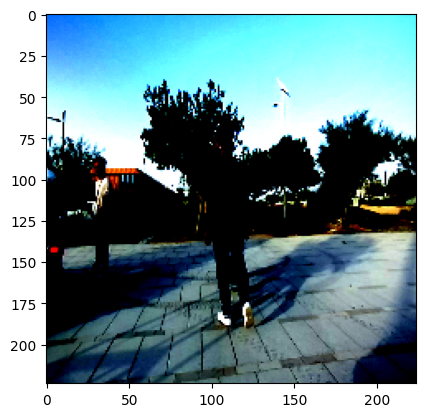

In [46]:
train_data_dir = '/home/pawan/TII_IR-Tracking/src/Daytime/RGB'
data = CatsDogs(train_data_dir)

im, label = data[1]
plt.imshow(im.permute(1,2,0).cpu())

In [4]:
im, label = data[200]
plt.imshow(im.permute(1,2,0).cpu())
print(label)

IndexError: list index out of range

In [9]:
import json
with open('/home/pawan/TII_IR-Tracking/src/Daytime/daytime.json') as f:
   data = json.load(f)

print(len(data["annotations"]))

44275


In [9]:
class Test_Modle(nn.Module):
    def __init__(self):
        super().__init__()
        self.weight = nn.Parameter(torch.randn(1,requires_grad=True,dtype=torch.float))
        self.bias = nn.Parameter(torch.rand(1,requires_grad=True,dtype=torch.float))

    def forward(self, x: torch.Tensor) -> torch.tensor:
        return self.weight * x + self.bias

inference mode will not keep track to the lerning parameters when testing your code so the model will run faster. 
*'with torch.inference_mode()' and be replaced with 'torch.no_grad()' but inference_mode is prefered

In [15]:
model_0 = Test_Modle()
model_0.state_dict()

OrderedDict([('weight', tensor([-1.3249])), ('bias', tensor([0.2253]))])

In [ ]:


with torch.inference_mode():
    y_pred = model_0(X_test)